In [655]:
"""
Simulation of a match. We generate sets of choices for each player for 5 points per game, 5 games per set,
3 sets per match. 
"""
import numpy as np
import random as rm
# mixed strategy probabilities
P1serve = [[8/15,7/15],[8/15,7/15]]
P2receive = [[2/3,1/3],[2/3,1/3]]
P1receive = [[2/7,5/7],[2/7,5/7]]
P2serve = [[4/7,3/7],[4/7,3/7]]
#Payoffs 
p1serve_win = {
    ('Left', 'Left'): 0.58,    
    ('Left', 'Right'): 0.79,   
    ('Right', 'Left'): 0.73,   
    ('Right', 'Right'): 0.49   
}
p2serve_win = {
    ('Left', 'Left'): 0.45,    
    ('Left', 'Right'): 0.6,   
    ('Right', 'Left'): 0.7,   
    ('Right', 'Right'): 0.5   
}

# Markov chain 
states = ["Left","Right"]
transition = [["LL","LR"],["RL","RR"]]
def markov_game(matrix, n):
    """
    Generates a chain of choices mased on a probability matrix
    Input: Number of choices in chain
           Probability matrix
    Output: List of choices
    """
    #initial condition doesn't matter, we pick left
    Condition = "Left"
    Choices = []
    for i in range(n):
        if Condition == "Left":
            change = np.random.choice(transition[0],p=matrix[0])
            if change == "LL":
                Choices.append("Left")
                pass
            elif change == "LR":
                Condition = "Right"
                Choices.append("Right")
        elif Condition == "Right":
            change = np.random.choice(transition[1],p=matrix[1])
            if change == "RL":
                Condition = "Left"
                Choices.append("Left")
                pass
            elif change == "RR":
                Choices.append("Right")
        i += 1  
    return Choices
def get_outcome(server_choice, receiver_choice,server):
    """
    Gets the outcome of a matchup
    Input: server choice, receiver choice, who served
    Output: Winner of interaction
    """
    if server == 'P1':     
        prob = p1serve_win[(server_choice, receiver_choice)]
    elif server == 'P2':
        prob = p2serve_win[(server_choice, receiver_choice)]
    return 'Server wins' if rm.random() < prob else 'Server loses'


def P1_serve_game():
    """
    Logic for a game where Player 1 serves
    """
    P1 = markov_game(P1serve, 5)
    P2 = markov_game(P2receive, 5)
    results = [get_outcome(server_choice, receiver_choice,'P1') for server_choice, receiver_choice in zip(P1, P2)]
    if results.count('Server wins') - results.count('Server loses') >1 :
        return'P1'
    elif results.count('Server loses') - results.count('Server wins') >1 :
        return'P2'
    else:
        while True:
            P1 = markov_game(P1serve, 1)
            P2 = markov_game(P2receive, 1)
            results += [get_outcome(server_choice, receiver_choice,'P1') for server_choice, receiver_choice in zip(P1, P2)]
            if results.count('Server wins') - results.count('Server loses') >1 :
                return'P1'
            elif results.count('Server loses') - results.count('Server wins') >1 :
                return'P2'
        
def P2_serve_game():
    """
    Logic for a game where player 2 serves
    """
    P1 = markov_game(P1receive,5)
    P2 = markov_game(P2serve,5)
    results = [get_outcome(server_choice, receiver_choice,'P2') for server_choice, receiver_choice in zip(P1, P2)]
    if results.count('Server wins') - results.count('Server loses') >1 :
        return'P2'
    elif results.count('Server loses') - results.count('Server wins') >1 :
        return'P1'
    else:
        while True:
            P1 = markov_game(P1serve, 1)
            P2 = markov_game(P2receive, 1)
            results += [get_outcome(server_choice, receiver_choice,'P2') for server_choice, receiver_choice in zip(P1, P2)]
            if results.count('Server wins') - results.count('Server loses') >1 :
                return'P2'
            elif results.count('Server loses') - results.count('Server wins') >1 :
                return'P1'

def set_win_con(p1score, p2score):
    """
    Win condition for a set
    Input: scores
    Output: True if the win condition has been met
    """
    return (p1score >= 6 or p2score >= 6) and abs(p1score - p2score) >= 2
        
def set():
    """
    Logic for running a set
    Output: One set score
    """
    p1score = 0
    p2score = 0
    while not set_win_con(p1score, p2score):
        res = P1_serve_game()
        if res == 'P1':
            p1score += 1
        else:
            p2score += 1
        if set_win_con(p1score, p2score):
            break
        res = P2_serve_game()
        if res == 'P1':
            p1score += 1
        else:
            p2score += 1
        if set_win_con(p1score, p2score):
            break
    return p1score, p2score
def match():
    """
    Logic for running a match
    Output: list of set scores
    """
    return [set(), set(), set(), set(), set()]

matches = [match() for _ in range(50)]


def analyze_matches(matches):
    """
    Code to get some information about matches 
    Input: list of set scores
    Output: range of information about the set scores
    """
    player1_sets_total = 0
    player2_sets_total = 0
    player1_matches_total = 0
    player2_matches_total = 0
    for i in matches:
        player1_sets = 0
        player2_sets = 0
        for j in i:
            if j[0]>j[1]:
                player1_sets += 1
                player1_sets_total +=1
            else:
                player2_sets += 1
                player2_sets_total +=1 
        if player1_sets > player2_sets:
            player1_matches_total += 1
        else:
            player2_matches_total += 1
                
    print(f"Player 1 total matches won: {player1_matches_total}")
    print(f"Player 2 total matches won: {player2_matches_total}")
    print(f"Player 1 total sets won:{player1_sets_total}")
    print(f"Player 2 total sets won:{player2_sets_total}")


# Analyze the matches
analyze_matches(matches)




Player 1 total matches won: 43
Player 2 total matches won: 7
Player 1 total sets won:176
Player 2 total sets won:74


In [577]:
"""
This code simulates a tennis game where payoffs are based on the statistics of each game played. 

"""
#storing L/R preferences 
P1serve_preference = []
P2receive_preference = []
P2serve_preference = []
p2receive_preference = []
#known payoffs for P1 serving, starting with 50/50
p1_LL_win = 1
p1_LL_count = 2
p1_LR_win = 1
p1_LR_count = 2

p1_RL_win = 1
p1_RL_count = 2
p1_RR_win= 1
p1_RR_count = 2
#known payoffs for P2 serving
p2_LL_win = 1
p2_LL_count = 2
p2_LR_win = 1
p2_LR_count = 2

p2_RL_win = 1
p2_RL_count = 2
p2_RR_win= 1
p2_RR_count = 2
#storing L/R preferences 
P1serve_preference = []
P2receive_preference = []
P2serve_preference = []
P1receive_preference = []

# generating payoffs from gathered information
A1 = np.array([
    [p1_LL_win/p1_LL_count, p1_LR_win/p1_LR_count],
    [p1_RL_win/p1_RL_count, p1_RR_win/p1_RR_count]])
B1 = np.array([
    [(p1_LL_count-p1_LL_win)/p1_LL_count, (p1_LR_count-p1_LR_win)/p1_LR_count],
    [(p1_RL_count-p1_RL_win)/p1_RL_count, (p1_RR_count-p1_RR_win)/p1_RR_count]])
#for p2 serve
A2 = np.array([
    [p1_LL_win/p1_LL_count, p1_LR_win/p1_LR_count],
    [p1_RL_win/p1_RL_count, p1_RR_win/p1_RR_count]])
B2 = np.array([
    [(p1_LL_count-p1_LL_win)/p1_LL_count, (p1_LR_count-p1_LR_win)/p1_LR_count],
    [(p1_RL_count-p1_RL_win)/p1_RL_count, (p1_RR_count-p1_RR_win)/p1_RR_count]])
#updating choice probabilities for the Markov Chain based on updated probabilities
def nash_strat(A,B):
    """
    Determines Nash equilibrium strategy
    Input: payoff matrices
    Output: equilibrium strategies
    """
    game = nash.Game(A, B)
    # Compute Nash equilibria
    equilibria = list(game.support_enumeration())
    return equilibria
def update_probabilities():
    """
    Updates the probabilities based on the nash equilibria
    """
    global P1serve, P2serve, P1receive, P2receive
    global P1serve_preference, P2receive_preference ,P2serve_preference,P1receive_preference 
    P1serve = [[nash_strat(A1,B1)[0][0][0],nash_strat(A1,B1)[0][0][1]],
           [nash_strat(A1,B1)[0][0][0],nash_strat(A1,B1)[0][0][1]]]
    P2receive = [[nash_strat(A1,B1)[0][1][0],nash_strat(A1,B1)[0][1][1]],
           [nash_strat(A1,B1)[0][1][0],nash_strat(A1,B1)[0][1][1]]]
    P1receive = [[nash_strat(A2,B2)[0][0][0],nash_strat(A2,B2)[0][0][1]],
           [nash_strat(A2,B2)[0][0][0],nash_strat(A2,B2)[0][0][1]]]
    P2serve = [[nash_strat(A2,B2)[0][1][0],nash_strat(A2,B2)[0][1][1]],
           [nash_strat(A2,B2)[0][1][0],nash_strat(A2,B2)[0][1][1]]]
    #store probabilities for tracking
    P1serve_preference += [P1serve]
    P2receive_preference += [P2receive]
    P2serve_preference += [P2serve]
    P1receive_preference += [P1receive]

"""
Game logic is modified as such: first game everything is 50/50. From there, stats are updated in get_outcome
"""

def get_outcome_mod(server_choice, receiver_choice, server):
    """
    Gets the outcome same as before, but keeps track of win rates to calculate payoffs
    """
    global p1_LL_win, p1_LL_count, p1_LR_win, p1_LR_count, p1_RL_win, p1_RL_count, p1_RR_win, p1_RR_count
    global p2_LL_win, p2_LL_count, p2_LR_win, p2_LR_count, p2_RL_win, p2_RL_count, p2_RR_win, p2_RR_count
    
    if server == 'P1':     
        prob = p1serve_win[(server_choice, receiver_choice)]
    elif server == 'P2':
        prob = p2serve_win[(server_choice, receiver_choice)]
    outcome = 'Server wins' if rm.random() < prob else 'Server loses'
    #When P1 serves
    if server == 'P1':
        #LL
        if server_choice == 'Left' and receiver_choice == 'Left':
            p1_LL_count += 1
            if outcome == 'Server wins':
                p1_LL_win += 1
        #LR
        if server_choice == 'Left' and receiver_choice == 'Right':
            p1_LR_count += 1
            if outcome == 'Server wins':
                p1_LR_win += 1
        #RL
        if server_choice == 'Right' and receiver_choice == 'Left':
            p1_RL_count += 1
            if outcome == 'Server wins':
                p1_RL_win += 1
        #RR
        if server_choice == 'Right' and receiver_choice == 'Right':
            p1_RR_count += 1
            if outcome == 'Server wins':
                p1_RR_win += 1                      
    #When P2 serves
    if server == 'P2':
        #LL
        if server_choice == 'Left' and receiver_choice == 'Left':
            p2_LL_count += 1
            if outcome == 'Server wins':
                p2_LL_win += 1
        #LR
        if server_choice == 'Left' and receiver_choice == 'Right':
            p2_LR_count += 1
            if outcome == 'Server wins':
                p2_LR_win += 1
        #RL
        if server_choice == 'Right' and receiver_choice == 'Left':
            p2_RL_count += 1
            if outcome == 'Server wins':
                p2_RL_win += 1
        #RR
        if server_choice == 'Right' and receiver_choice == 'Right':
            p2_RR_count += 1
            if outcome == 'Server wins':
                p2_RR_win += 1
    update_probabilities()
    return outcome
def P1_serve_game_mod():
    P1 = markov_game(P1serve, 5)
    P2 = markov_game(P2receive, 5)
    results = [get_outcome_mod(server_choice, receiver_choice,'P1') for server_choice, receiver_choice in zip(P1, P2)]
    if results.count('Server wins') - results.count('Server loses') >1 :
        return'P1'
    elif results.count('Server loses') - results.count('Server wins') >1 :
        return'P2'
    else:
        while True:
            P1 = markov_game(P1serve, 1)
            P2 = markov_game(P2receive, 1)
            results += [get_outcome_mod(server_choice, receiver_choice,'P1') for server_choice, receiver_choice in zip(P1, P2)]
            if results.count('Server wins') - results.count('Server loses') >1 :
                return'P1'
            elif results.count('Server loses') - results.count('Server wins') >1 :
                return'P2'
def P2_serve_game_mod():
    P1 = markov_game(P1receive,5)
    P2 = markov_game(P2serve,5)
    results = [get_outcome_mod(server_choice, receiver_choice,'P2') for server_choice, receiver_choice in zip(P1, P2)]
    if results.count('Server wins') - results.count('Server loses') >1 :
        return'P2'
    elif results.count('Server loses') - results.count('Server wins') >1 :
        return'P1'
    else:
        while True:
            P1 = markov_game(P1serve, 1)
            P2 = markov_game(P2receive, 1)
            results += [get_outcome_mod(server_choice, receiver_choice,'P2') for server_choice, receiver_choice in zip(P1, P2)]
            if results.count('Server wins') - results.count('Server loses') >1 :
                return'P2'
            elif results.count('Server loses') - results.count('Server wins') >1 :
                return'P1'

def set_win_con(p1score, p2score):
    return (p1score >= 6 or p2score >= 6) and abs(p1score - p2score) >= 2
        
def set_mod():
    p1score = 0
    p2score = 0
    while not set_win_con(p1score, p2score):
        res = P1_serve_game_mod()
        if res == 'P1':
            p1score += 1
        else:
            p2score += 1
        if set_win_con(p1score, p2score):
            break
        res = P2_serve_game_mod()
        if res == 'P1':
            p1score += 1
        else:
            p2score += 1
        if set_win_con(p1score, p2score):
            break

    return p1score, p2score
def match_mod():
    a = [set_mod(), set_mod(), set_mod(),set_mod(),set_mod()]
    return a

matches = [match_mod() for _ in range(1)]


# Analyze the matches
analyze_matches(matches)



Player 1 total matches won: 1
Player 2 total matches won: 0
Player 1 total sets won:5
Player 2 total sets won:0


In [569]:
print(p1_LL_win,p1_LL_count,
      p1_RL_win,p1_RL_count,
      p1_RR_win,p1_RR_count,
      p1_LR_win,p1_LR_count,
      p2_LL_win,p1_LL_count,
      p2_LR_win,p2_LR_count,
      p2_RL_win,p2_RL_count,
      p2_RR_win,p2_RR_count)

8796 15300 410 564 23 44 470 588 6647 15300 320 545 368 546 18 35


In [650]:
"""
Here, there is a small chance of the choice changing randomly
"""
#storing L/R preferences 
P1serve_preference = []
P2receive_preference = []
P2serve_preference = []
p2receive_preference = []
def markov_game_random(matrix, n, prob_random):
    """
    Adds a small chance of a choice flipping
    """
    #initial condition doesn't matter, we pick left
    Condition = "Left"
    Choices = []
    for i in range(n):
        if Condition == "Left":
            change = np.random.choice(transition[0],p=matrix[0])
            if change == "LL":
                Choices.append("Left")
                pass
            elif change == "LR":
                Condition = "Right"
                Choices.append("Right")
        elif Condition == "Right":
            change = np.random.choice(transition[1],p=matrix[1])
            if change == "RL":
                Condition = "Left"
                Choices.append("Left")
                pass
            elif change == "RR":
                Choices.append("Right")
        i += 1  
    for i in range(len(Choices)):
        if rm.random()<prob_random:
            if Choices[i] == 'Left':
                Choices[i] = 'Right'
            if Choices[i] == 'Right':
                Choices[i] == 'Left'
    return Choices


def P1_serve_game_random(prob_random):
    P1 = markov_game_random(P1serve, 5, prob_random)
    P2 = markov_game_random(P2receive, 5, prob_random)
    results = [get_outcome_mod(server_choice, receiver_choice,'P1') for server_choice, receiver_choice in zip(P1, P2)]
    if results.count('Server wins') - results.count('Server loses') >1 :
        return'P1'
    elif results.count('Server loses') - results.count('Server wins') >1 :
        return'P2'
    else:
        while True:
            P1 = markov_game_random(P1serve, 1,prob_random)
            P2 = markov_game_random(P2receive, 1,prob_random)
            results += [get_outcome_mod(server_choice, receiver_choice,'P1') for server_choice, receiver_choice in zip(P1, P2)]
            if results.count('Server wins') - results.count('Server loses') >1 :
                return'P1'
            elif results.count('Server loses') - results.count('Server wins') >1 :
                return'P2'
def P2_serve_game_random(prob_random):
    P1 = markov_game_random(P1receive,5, prob_random)
    P2 = markov_game_random(P2serve,5,prob_random)
    results = [get_outcome_mod(server_choice, receiver_choice,'P2') for server_choice, receiver_choice in zip(P1, P2)]
    if results.count('Server wins') - results.count('Server loses') >1 :
        return'P2'
    elif results.count('Server loses') - results.count('Server wins') >1 :
        return'P1'
    else:
        while True:
            P1 = markov_game_random(P1serve, 1,prob_random)
            P2 = markov_game_random(P2receive, 1,prob_random)
            results += [get_outcome_mod(server_choice, receiver_choice,'P2') for server_choice, receiver_choice in zip(P1, P2)]
            if results.count('Server wins') - results.count('Server loses') >1 :
                return'P2'
            elif results.count('Server loses') - results.count('Server wins') >1 :
                return'P1'
def set_random(prob_random):
    p1score = 0
    p2score = 0
    while not set_win_con(p1score, p2score):
        res = P1_serve_game_random(prob_random)
        if res == 'P1':
            p1score += 1
        else:
            p2score += 1
        if set_win_con(p1score, p2score):
            break
        res = P2_serve_game_random(prob_random)
        if res == 'P1':
            p1score += 1
        else:
            p2score += 1
        if set_win_con(p1score, p2score):
            break

    return p1score, p2score
def match_random(prob_random):
    a= [set_random(prob_random), set_random(prob_random), set_random(prob_random),set_random(prob_random),set_random(prob_random)]
    return a
matches = [match_random(0.2) for _ in range(3)]
analyze_matches(matches)


/Users/vladmonakhov/opt/anaconda3/lib/python3.9/site-packages/nashpy/algorithms/support_enumeration.py:260: RuntimeWarning: 
An even number of (4) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


Player 1 total matches won: 3
Player 2 total matches won: 0
Player 1 total sets won:11
Player 2 total sets won:4


In [582]:
print(p1_LL_win/p1_LL_count,
      p1_LR_win/p1_LR_count,
      p1_RL_win/p1_RL_count,
      p1_RR_win/p1_RR_count,
      p2_LL_win/p1_LL_count,
      p2_LR_win/p2_LR_count,
      p2_RL_win/p2_RL_count,
      p2_RR_win/p2_RR_count)

0.5801980198019802 0.7954545454545454 0.7804878048780488 0.8 0.4158415841584158 0.6041666666666666 0.6842105263157895 0.4166666666666667


In [653]:
"""
Finally, this code uses Simulated Annealing to close in on the most effective L/R ratio for each case. 
"""
import numpy as np
import random 
#storing L/R preferences 
P1serve_preference = []
P2receive_preference = []
P2serve_preference = []
P1receive_preference = []
# Initial mixed strategy probabilities
P1serve = [[0.5,0.5],[0.5,0.5]]
P2receive = [[0.5,0.5],[0.5,0.5]]
P1receive = [[0.5,0.5],[0.5,0.5]]
P2serve = [[0.5,0.5],[0.5,0.5]]
#Establish variables to track performance of a given probability
p1_serve_games_won = 0
p2_receive_games_won = 0
p2_serve_games_won = 0
p1_receive_games_won = 0

def update_probs(temperature):
    """
    This function changes the probability of each choice by a random amount specified by the temperature
    Input: Variation temperature
    Output: New probabilities
    """
    global P1serve_preference, P2receive_preference ,P2serve_preference,P1receive_preference 
    P1serve_new = [[0,0],[0,0]]
    a = random.uniform(-temperature, temperature)
    P1serve_new = [[P1serve[0][0] + a,P1serve[0][1] - a],[P1serve[0][0] + a,P1serve[0][1] - a]]
    
    P2serve_new = [[0,0],[0,0]]
    b = random.uniform(-temperature, temperature)
    P2serve_new = [[P2serve[0][0] + b,P2serve[0][1] - b],[P2serve[0][0] + b,P2serve[0][1] - b]]
    
    P1receive_new = [[0,0],[0,0]]
    c = random.uniform(-temperature, temperature)
    P1receive_new = [[P1receive[0][0] + c,P1receive[0][1] - c],[P1receive[0][0] + c,P1receive[0][1] - c]]
    
    P2receive_new = [[0,0],[0,0]]
    d = random.uniform(-temperature, temperature)
    P2receive_new = [[P2receive[0][0] + d,P2receive[0][1] - d],[P2receive[0][0] + d,P2receive[0][1] - d]]
    check_neg = [P1serve_new,P2receive_new,P2serve_new,P1receive_new]
    for i in check_neg:
        for j in i:
            for r in range(2):
                if j[r] <0:
                    j[r] = 0
                if j[r] >1:
                    j[r] = 1
    P1serve_preference += [P1serve]
    P2receive_preference += [P2receive]
    P2serve_preference += [P2serve]
    P1receive_preference += [P1receive]
            
    return P1serve_new,P2receive_new,P2serve_new,P1receive_new

def get_outcome_annealing(server_choice, receiver_choice,server):
    """
    The only difference here is that it updates the statistics we need for this approach
    """
    global p1_serve_games_won,p2_serve_games_won,p1_receive_games_won,p2_receive_games_won
    if server == 'P1':     
        prob = p1serve_win[(server_choice, receiver_choice)]
    elif server == 'P2':
        prob = p2serve_win[(server_choice, receiver_choice)]
    outcome =  'Server wins' if rm.random() < prob else 'Server loses'
    if server == 'P1':
        if outcome == 'Server wins':
            p1_serve_games_won += 1
        else:
            p2_receive_games_won += 1
    if server == 'P2':
        if outcome == 'Server wins':
            p2_serve_games_won += 1
        else:
            p1_receive_games_won += 1
    return outcome
probs_annealing = []
def P1_serve_game_annealing():
    
    P1 = markov_game(P1serve, 5)
    P2 = markov_game(P2receive, 5)
    results = [get_outcome_annealing(server_choice, receiver_choice,'P1') for server_choice, receiver_choice in zip(P1, P2)]
    if results.count('Server wins') - results.count('Server loses') >1 :
        return'P1'
    elif results.count('Server loses') - results.count('Server wins') >1 :
        return'P2'
    else:
        while True:
            P1 = markov_game(P1serve, 1)
            P2 = markov_game(P2receive, 1)
            results += [get_outcome_annealing(server_choice, receiver_choice,'P1') for server_choice, receiver_choice in zip(P1, P2)]
            if results.count('Server wins') - results.count('Server loses') >1 :
                return'P1'
            elif results.count('Server loses') - results.count('Server wins') >1 :
                return'P2'
def P2_serve_game_annealing():

    P1 = markov_game(P1receive,5)
    P2 = markov_game(P2serve,5)
    results = [get_outcome_annealing(server_choice, receiver_choice,'P2') for server_choice, receiver_choice in zip(P1, P2)]
    if results.count('Server wins') - results.count('Server loses') >1 :
        return'P2'
    elif results.count('Server loses') - results.count('Server wins') >1 :
        return'P1'
    else:
        while True:
            P1 = markov_game(P1serve, 1)
            P2 = markov_game(P2receive, 1)
            results += [get_outcome_annealing(server_choice, receiver_choice,'P2') for server_choice, receiver_choice in zip(P1, P2)]
            if results.count('Server wins') - results.count('Server loses') >1 :
                return'P2'
            elif results.count('Server loses') - results.count('Server wins') >1 :
                return'P1'
def set_annealing(temperature):
    """
    This set function stores the new and original probabilities, and compares the results of the two to 
    decide if the new probability should be kept or not
    """
    global p1_serve_games_won,p2_serve_games_won,p1_receive_games_won,p2_receive_games_won
    global P1serve,P2serve,P1receive,P2receive, probs_annealing
    #reset win count for each strategy
    a = p1_serve_games_won 
    b = p2_receive_games_won 
    c = p2_serve_games_won 
    d = p1_receive_games_won 
    e = P1serve
    f = P2receive
    g = P2serve
    h = P1receive
    #add preferences for analyzing
    probs_annealing += [P1serve,P2receive,P2serve,P1receive]
    #reset statistics
    p1_serve_games_won = 0
    p2_receive_games_won = 0
    p2_serve_games_won = 0
    p1_receive_games_won = 0
    #Get a new set of probabilities 
    P1serve,P2receive,P2serve,P1receive = update_probs(temperature)
    p1score = 0
    p2score = 0
    #set logic
    while not set_win_con(p1score, p2score):
        res = P1_serve_game()
        if res == 'P1':
            p1score += 1
        else:
            p2score += 1
        if set_win_con(p1score, p2score):
            break
        res = P2_serve_game()
        if res == 'P1':
            p1score += 1
        else:
            p2score += 1
        if set_win_con(p1score, p2score):
            break
    #Check if the new split is better than the old one
    if p1_serve_games_won < a:
        P1serve  = e
    if p2_receive_games_won < b:
        P2receive  = f
    if p1_serve_games_won < c:
        P1serve  = g
    if p1_receive_games_won < d:
        P2receive  = h
    return p1score, p2score
def match_annealing(temperature):
    a = [set_annealing(temperature), set_annealing(temperature), set_annealing(temperature),set_annealing(temperature),set_annealing(temperature)]
    return a

matches = [match_annealing(0.2) for _ in range(50)]       

analyze_matches(matches)




Player 1 total matches won: 48
Player 2 total matches won: 2
Player 1 total sets won:197
Player 2 total sets won:53


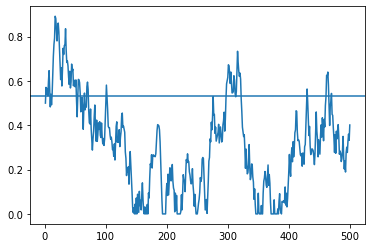

In [636]:
import matplotlib
def plot_preferences(target):
    x_val = range(1,50)
    y_val = []
    for i in target:
         y_val += [i[0][0]]
    plt.plot(x_val,y_val)
#plt.plot(x_val,P1serve_preference[0])
plot_preferences(P1serve_preference)
plt.axhline(0.53)

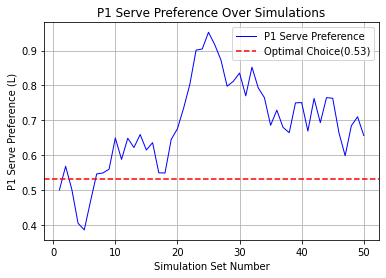

In [644]:
import matplotlib.pyplot as plt

def plot_preferences(target):
    x_val = range(1, len(target) + 1)
    y_val = [i[0][0] for i in target]

    plt.plot(x_val, y_val, label='P1 Serve Preference', color='blue', linewidth=1)
    plt.axhline(0.53, color='red', linestyle='--', label='Optimal Choice(0.53)')
    
    plt.title('P1 Serve Preference Over Simulations')
    plt.xlabel('Simulation Set Number')
    plt.ylabel('P1 Serve Preference (L)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example target data (assuming you have P1serve_preference defined)

plot_preferences(P1serve_preference)


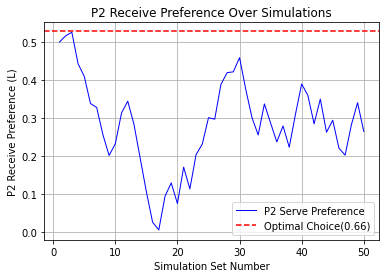

In [645]:
import matplotlib.pyplot as plt

def plot_preferences(target):
    x_val = range(1, len(target) + 1)
    y_val = [i[0][0] for i in target]

    plt.plot(x_val, y_val, label='P2 Serve Preference', color='blue', linewidth=1)
    plt.axhline(0.53, color='red', linestyle='--', label='Optimal Choice(0.66)')
    
    plt.title('P2 Receive Preference Over Simulations')
    plt.xlabel('Simulation Set Number')
    plt.ylabel('P2 Receive Preference (L)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example target data (assuming you have P1serve_preference defined)

plot_preferences(P2receive_preference)


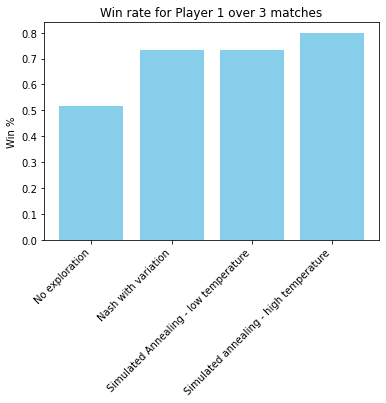

In [651]:
import matplotlib.pyplot as plt

# Data for the bar graph
labels = ['No exploration', 'Nash with variation', 'Simulated Annealing - low temperature', 'Simulated annealing - high temperature']
values = [29/56, 11/15, 11/15, 12/15]

# Create the bar graph
plt.bar(labels, values, color='skyblue')

# Add titles and labels
plt.title('Win rate for Player 1 over 3 matches')
plt.ylabel('Win %')
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()


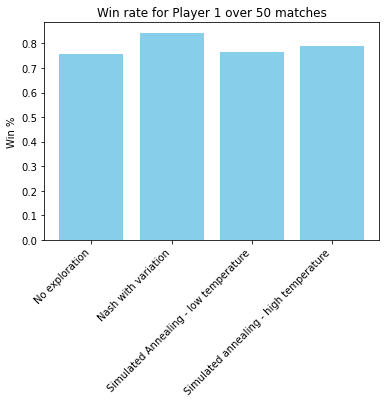

In [654]:
import matplotlib.pyplot as plt

# Data for the bar graph
labels = ['No exploration', 'Nash with variation', 'Simulated Annealing - low temperature', 'Simulated annealing - high temperature']
values = [0.756, 0.844, 0.764, 0.788]

# Create the bar graph
plt.bar(labels, values, color='skyblue')

# Add titles and labels
plt.title('Win rate for Player 1 over 50 matches')
plt.ylabel('Win %')
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()
